=== LOADING DATA ===
Total samples: 2109

=== 1. ANALISIS DISTRIBUSI KELAS ===


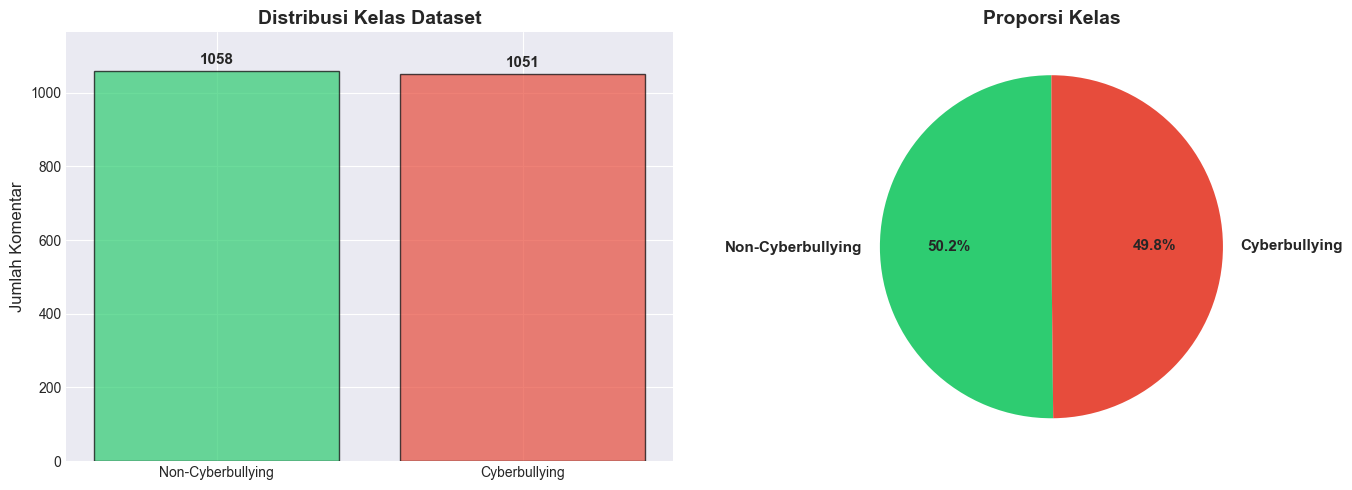

Non-Cyberbullying: 1051 (49.83%)
Cyberbullying: 1058 (50.17%)
Imbalance Ratio: 0.99:1


In [ ]:
"""
Notebook 2: Exploratory Data Analysis (EDA)
Analisis mendalam terhadap dataset untuk publikasi jurnal
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ===== LOAD DATA =====
print("=== LOADING DATA ===")
df = pd.read_csv('../data/processed/full_data.csv')
print(f"Total samples: {len(df)}")

# ===== 1. DISTRIBUSI KELAS =====
print("\n=== 1. ANALISIS DISTRIBUSI KELAS ===")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
class_counts = df['label'].value_counts()
labels = ['Non-Cyberbullying', 'Cyberbullying']
colors = ['#2ecc71', '#e74c3c']

axes[0].bar(labels, class_counts.values, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Jumlah Komentar', fontsize=12)
axes[0].set_title('Distribusi Kelas Dataset', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, max(class_counts.values) * 1.1)

for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 20, str(v), ha='center', fontweight='bold', fontsize=11)

# Pie chart
axes[1].pie(class_counts.values, labels=labels, colors=colors, autopct='%1.1f%%',
            startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Proporsi Kelas', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Non-Cyberbullying: {class_counts[0]} ({class_counts[0]/len(df)*100:.2f}%)")
print(f"Cyberbullying: {class_counts[1]} ({class_counts[1]/len(df)*100:.2f}%)")
print(f"Imbalance Ratio: {class_counts[0]/class_counts[1]:.2f}:1")


=== 2. ANALISIS PANJANG KOMENTAR ===


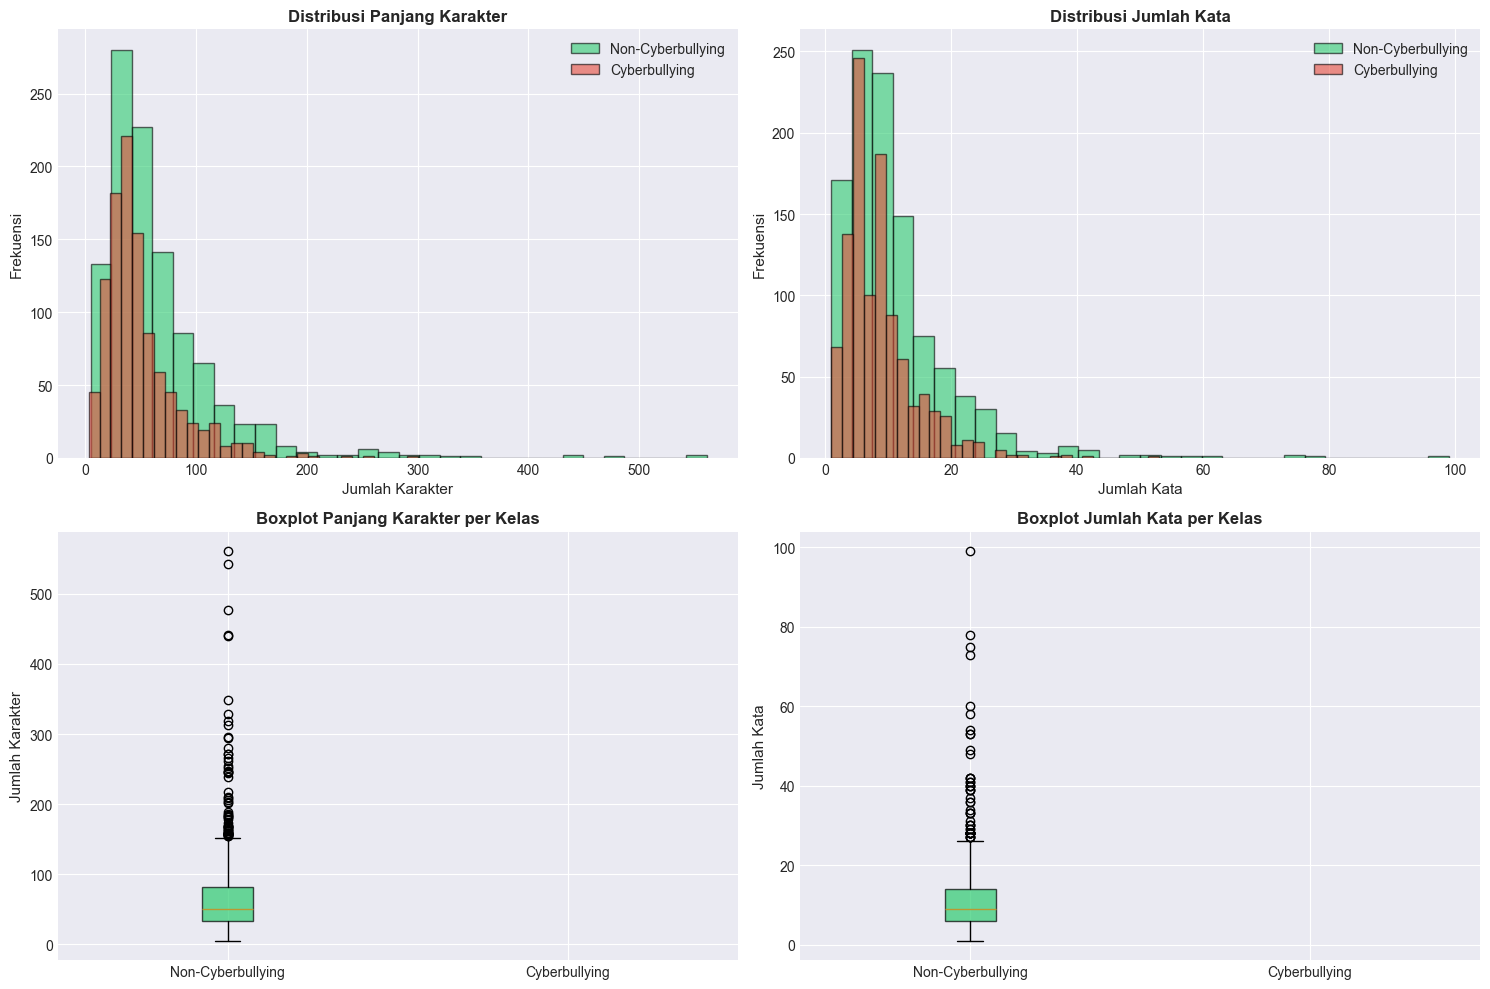


Statistik Panjang Komentar:

Non-Cyberbullying:
        char_count   word_count
count  1051.000000  1051.000000
mean     65.605138    11.076118
std      56.011828     9.046752
min       5.000000     1.000000
25%      33.000000     6.000000
50%      50.000000     9.000000
75%      81.000000    14.000000
max     561.000000    99.000000

Cyberbullying:
        char_count   word_count
count  1057.000000  1057.000000
mean     49.287606     8.595080
std      33.456193     5.683133
min       3.000000     1.000000
25%      29.000000     5.000000
50%      41.000000     7.000000
75%      60.000000    10.000000
max     300.000000    53.000000


In [3]:
# ===== 2. ANALISIS PANJANG KOMENTAR =====
print("\n=== 2. ANALISIS PANJANG KOMENTAR ===")

df['word_count'] = df['cleaned_comment'].str.split().str.len()
df['char_count'] = df['cleaned_comment'].str.len()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Character count distribution
for label in [0, 1]:
    label_name = 'Non-Cyberbullying' if label == 0 else 'Cyberbullying'
    color = '#2ecc71' if label == 0 else '#e74c3c'
    data = df[df['label'] == label]['char_count']
    
    axes[0, 0].hist(data, bins=30, alpha=0.6, label=label_name, color=color, edgecolor='black')

axes[0, 0].set_xlabel('Jumlah Karakter', fontsize=11)
axes[0, 0].set_ylabel('Frekuensi', fontsize=11)
axes[0, 0].set_title('Distribusi Panjang Karakter', fontsize=12, fontweight='bold')
axes[0, 0].legend()

# Word count distribution
for label in [0, 1]:
    label_name = 'Non-Cyberbullying' if label == 0 else 'Cyberbullying'
    color = '#2ecc71' if label == 0 else '#e74c3c'
    data = df[df['label'] == label]['word_count']
    
    axes[0, 1].hist(data, bins=30, alpha=0.6, label=label_name, color=color, edgecolor='black')

axes[0, 1].set_xlabel('Jumlah Kata', fontsize=11)
axes[0, 1].set_ylabel('Frekuensi', fontsize=11)
axes[0, 1].set_title('Distribusi Jumlah Kata', fontsize=12, fontweight='bold')
axes[0, 1].legend()

# Box plot - Character count
data_to_plot = [df[df['label'] == 0]['char_count'], df[df['label'] == 1]['char_count']]
bp1 = axes[1, 0].boxplot(data_to_plot, labels=['Non-Cyberbullying', 'Cyberbullying'],
                          patch_artist=True)
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1, 0].set_ylabel('Jumlah Karakter', fontsize=11)
axes[1, 0].set_title('Boxplot Panjang Karakter per Kelas', fontsize=12, fontweight='bold')

# Box plot - Word count
data_to_plot = [df[df['label'] == 0]['word_count'], df[df['label'] == 1]['word_count']]
bp2 = axes[1, 1].boxplot(data_to_plot, labels=['Non-Cyberbullying', 'Cyberbullying'],
                          patch_artist=True)
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1, 1].set_ylabel('Jumlah Kata', fontsize=11)
axes[1, 1].set_title('Boxplot Jumlah Kata per Kelas', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistics
print("\nStatistik Panjang Komentar:")
print("\nNon-Cyberbullying:")
print(df[df['label'] == 0][['char_count', 'word_count']].describe())
print("\nCyberbullying:")
print(df[df['label'] == 1][['char_count', 'word_count']].describe())


=== 3. WORD CLOUD ANALYSIS ===


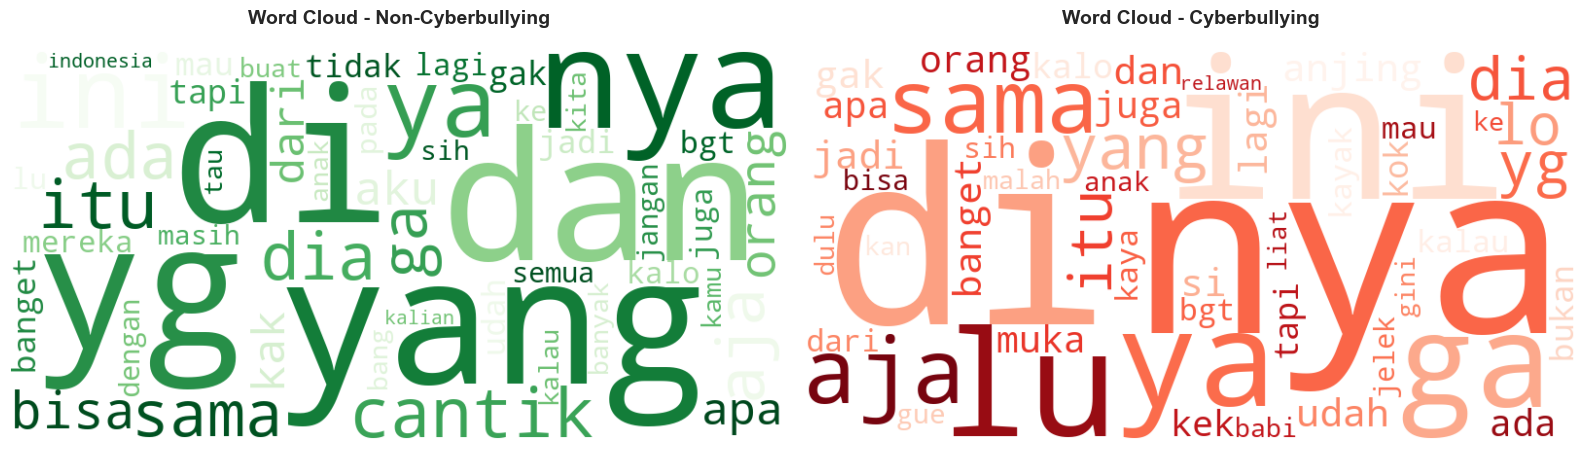

In [3]:
# ===== 3. WORD CLOUD =====
print("\n=== 3. WORD CLOUD ANALYSIS ===")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# WordCloud for Non-Cyberbullying
text_non_cyber = ' '.join(df[df['label'] == 0]['cleaned_comment'].astype(str))
wordcloud_non = WordCloud(width=800, height=400, background_color='white',
                           colormap='Greens', max_words=50).generate(text_non_cyber)

axes[0].imshow(wordcloud_non, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud - Non-Cyberbullying', fontsize=14, fontweight='bold', pad=20)

# WordCloud for Cyberbullying
text_cyber = ' '.join(df[df['label'] == 1]['cleaned_comment'].astype(str))
wordcloud_cyber = WordCloud(width=800, height=400, background_color='white',
                            colormap='Reds', max_words=50).generate(text_cyber)

axes[1].imshow(wordcloud_cyber, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud - Cyberbullying', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../results/figures/wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()


=== 4. TOP WORDS FREQUENCY ===


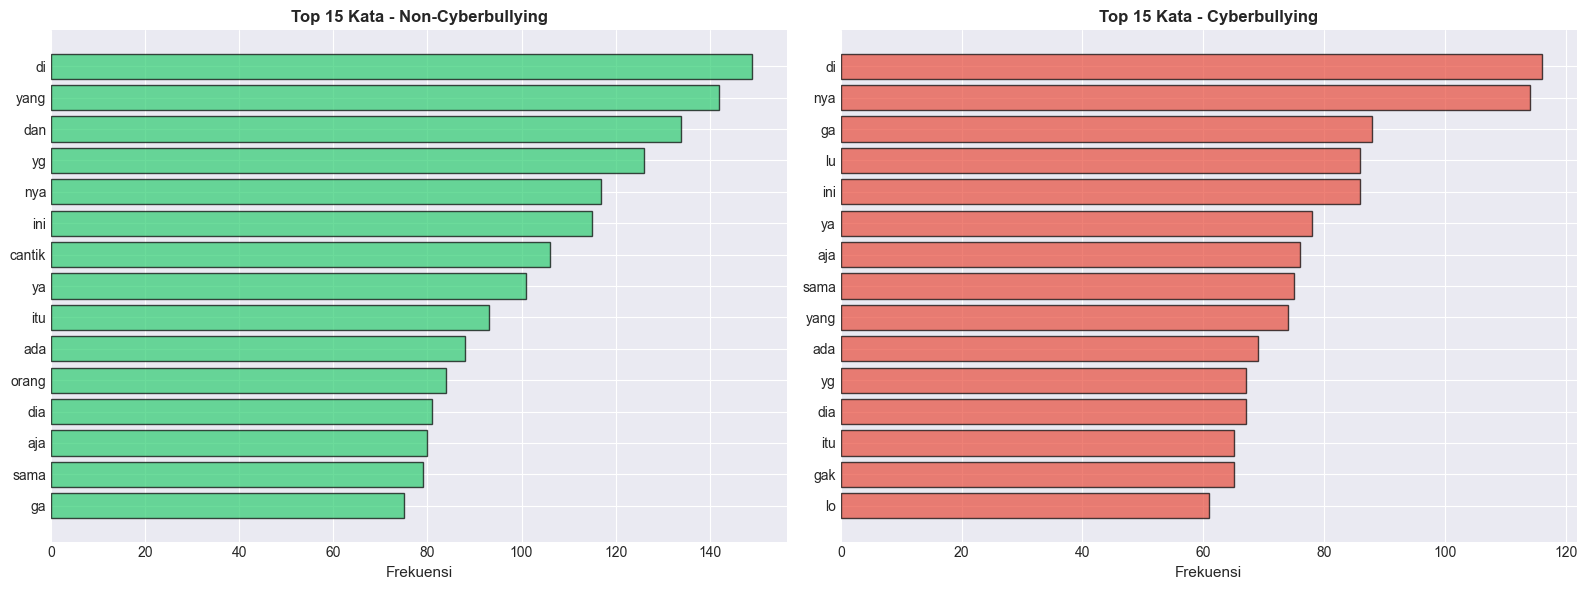

In [4]:
# ===== 4. TOP WORDS ANALYSIS =====
print("\n=== 4. TOP WORDS FREQUENCY ===")

def get_top_words(text_series, n=15):
    """Mendapatkan top n kata paling sering"""
    all_words = ' '.join(text_series.astype(str)).split()
    word_freq = Counter(all_words)
    return word_freq.most_common(n)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top words Non-Cyberbullying
top_non_cyber = get_top_words(df[df['label'] == 0]['cleaned_comment'])
words_non, counts_non = zip(*top_non_cyber)
axes[0].barh(range(len(words_non)), counts_non, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0].set_yticks(range(len(words_non)))
axes[0].set_yticklabels(words_non)
axes[0].set_xlabel('Frekuensi', fontsize=11)
axes[0].set_title('Top 15 Kata - Non-Cyberbullying', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()

# Top words Cyberbullying
top_cyber = get_top_words(df[df['label'] == 1]['cleaned_comment'])
words_cyber, counts_cyber = zip(*top_cyber)
axes[1].barh(range(len(words_cyber)), counts_cyber, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1].set_yticks(range(len(words_cyber)))
axes[1].set_yticklabels(words_cyber)
axes[1].set_xlabel('Frekuensi', fontsize=11)
axes[1].set_title('Top 15 Kata - Cyberbullying', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('../results/figures/top_words.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
# ===== SAVE SUMMARY STATISTICS =====
print("\n=== MENYIMPAN STATISTIK ===")
summary_stats = {
    'Total Samples': len(df),
    'Non-Cyberbullying Count': int(class_counts[0]),
    'Cyberbullying Count': int(class_counts[1]),
    'Non-Cyberbullying Percentage': f"{class_counts[0]/len(df)*100:.2f}%",
    'Cyberbullying Percentage': f"{class_counts[1]/len(df)*100:.2f}%",
    'Avg Char Count (Non-Cyber)': f"{df[df['label']==0]['char_count'].mean():.2f}",
    'Avg Char Count (Cyber)': f"{df[df['label']==1]['char_count'].mean():.2f}",
    'Avg Word Count (Non-Cyber)': f"{df[df['label']==0]['word_count'].mean():.2f}",
    'Avg Word Count (Cyber)': f"{df[df['label']==1]['word_count'].mean():.2f}"
}

summary_df = pd.DataFrame(list(summary_stats.items()), columns=['Metric', 'Value'])
summary_df.to_csv('../results/metrics/eda_summary.csv', index=False)
print("✓ Statistik disimpan di ../results/metrics/eda_summary.csv")

print("\n=== EDA SELESAI ===")
print("Grafik tersimpan di folder ../results/figures/")
print("Lanjutkan ke notebook 03_model_training.ipynb")


=== MENYIMPAN STATISTIK ===
✓ Statistik disimpan di ../results/metrics/eda_summary.csv

=== EDA SELESAI ===
Grafik tersimpan di folder ../results/figures/
Lanjutkan ke notebook 03_model_training.ipynb
